In [1]:
from caveclient import CAVEclient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from standard_transform import minnie_ds
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

datastack_name = 'minnie65_public'
client = CAVEclient(datastack_name)

client.info.get_datastack_info()['description']

client.materialize.get_versions()

versions = sorted(client.materialize.get_versions(), key = lambda v: client.materialize.get_timestamp(v))

for version in versions:
    print(f"Version {version}: {client.materialize.get_timestamp(version)}")

# CAVE always use the same version for consistency
client.version = 1621

Version 117: 2021-06-11 08:10:00.215114+00:00
Version 343: 2022-02-24 08:10:00.184668+00:00
Version 661: 2023-04-06 20:17:09.199182+00:00
Version 795: 2023-08-23 08:10:01.404268+00:00
Version 943: 2024-01-22 08:10:01.497934+00:00
Version 1078: 2024-06-05 10:10:01.203215+00:00
Version 1181: 2024-09-16 10:10:01.121167+00:00
Version 1300: 2025-01-13 10:10:01.286229+00:00
Version 1412: 2025-04-29 10:10:01.200893+00:00
Version 1507: 2025-07-31 08:10:01.117494+00:00
Version 1621: 2025-11-25 08:10:01.094430+00:00


In [2]:
cell_type_one = '23P'

cell_type_one_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = cell_type_one).query(split_positions = True)
cell_type_one_list = cell_type_one_df['pt_root_id'].tolist()

proofread_one_df = client.materialize.tables.proofreading_status_and_strategy(pt_root_id = cell_type_one_list).query(split_positions = True)
proofread_one_df

,id,created,superceded_id,valid,pt_position_x,pt_position_y,pt_position_z,valid_id,status_dendrite,status_axon,strategy_dendrite,strategy_axon,pt_supervoxel_id,pt_root_id
0,72,2024-06-03 19:45:52.554963+00:00,<NA>,True,299067,123129,22993,864691134884807418,True,True,dendrite_extended,axon_interareal,105913344770753749,864691134884807418
1,2172,2024-10-26 18:29:34.494754+00:00,<NA>,True,176288,143856,22394,864691134886335738,True,True,dendrite_clean,axon_partially_extended,89027594879935968,864691134886335738
2,3438,2025-03-24 20:49:59.457604+00:00,<NA>,True,333436,104369,20076,864691134886828794,True,True,dendrite_clean,axon_interareal,110625507674057836,864691134886828794
3,1306,2024-06-03 19:45:53.392755+00:00,<NA>,True,149888,121376,23978,864691134941299811,True,True,dendrite_extended,axon_partially_extended,85365396727134600,864691134941299811
4,1854,2024-08-21 19:28:33.820651+00:00,<NA>,True,187696,126560,21803,864691134941412707,True,True,dendrite_clean,axon_partially_extended,90573370722448987,864691134941412707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1678,2024-08-02 22:14:53.944905+00:00,<NA>,True,178976,124432,21326,864691136991328917,True,True,dendrite_extended,axon_partially_extended,89376827126485917,864691136991328917
535,4617,2025-11-25 00:35:39.262214+00:00,<NA>,True,191232,105888,22427,864691137021898862,True,True,dendrite_clean,axon_partially_extended,91063203219879884,864691137021898862
536,4411,2025-10-29 18:15:45.938976+00:00,<NA>,True,172864,133024,21760,864691135592750859,True,True,dendrite_extended,axon_partially_extended,88533570494493324,864691137021996142
537,1313,2024-06-03 19:45:53.397416+00:00,<NA>,True,263456,116464,21868,864691137198382657,True,True,dendrite_extended,axon_partially_extended,100986639190778502,864691137198382657


In [3]:
from functions import bounding_box
cell_type_two = 'BC'
bounding_box_twotypes = bounding_box(1, 10, 1, 1500, 240, 1500)

cell_type_two_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = cell_type_two, pt_position_bbox = bounding_box_twotypes).query(split_positions = True)
cell_type_two_list = cell_type_two_df['pt_root_id'].tolist()

cell_type_two_df

voxels: x=[9110], y=[101259], z=[25]
voxels: x=[387445], y=[125879], z=[37500]


,id,created,valid,volume,pt_position_x,pt_position_y,pt_position_z,bb_start_position_x,bb_start_position_y,bb_start_position_z,...,bb_end_position_y,bb_end_position_z,pt_supervoxel_id,pt_root_id,id_ref,created_ref,valid_ref,target_id,classification_system,cell_type
0,389184,2020-09-28 22:40:42.662312+00:00,True,298.370667,231776,108448,18585,<NA>,<NA>,<NA>,...,<NA>,<NA>,96622677137266079,864691136177312774,45030,2023-12-19 22:49:25.590640+00:00,True,389184,inhibitory_neuron,BC
1,582212,2020-09-28 22:40:44.618242+00:00,True,287.646851,343616,118272,18830,<NA>,<NA>,<NA>,...,<NA>,<NA>,112034737782504549,864691136123737638,76807,2023-12-19 22:57:13.590582+00:00,True,582212,inhibitory_neuron,BC
2,453682,2020-09-28 22:40:44.558496+00:00,True,265.496643,276816,114944,18304,<NA>,<NA>,<NA>,...,<NA>,<NA>,102816019911251602,864691135491585767,56668,2023-12-19 22:52:16.323700+00:00,True,453682,inhibitory_neuron,BC
3,553831,2020-09-28 22:40:46.437663+00:00,True,271.126373,326560,121472,24768,<NA>,<NA>,<NA>,...,<NA>,<NA>,109642613602397191,864691135941039361,72212,2023-12-19 22:56:01.897204+00:00,True,553831,inhibitory_neuron,BC
4,64215,2020-09-28 22:40:46.324941+00:00,True,242.664566,94816,125552,21033,<NA>,<NA>,<NA>,...,<NA>,<NA>,77836490519948708,864691135582052717,86039,2023-12-19 22:59:37.963593+00:00,True,64215,inhibitory_neuron,BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,454148,2020-09-28 22:45:23.384683+00:00,True,421.160217,272176,123840,21920,<NA>,<NA>,<NA>,...,<NA>,<NA>,102183869914520234,864691135503982517,56837,2023-12-19 22:52:18.506129+00:00,True,454148,inhibitory_neuron,BC
366,422862,2020-09-28 22:45:23.568749+00:00,True,429.985138,256608,116800,26921,<NA>,<NA>,<NA>,...,<NA>,<NA>,100071846187496529,864691135782495568,51613,2023-12-19 22:51:04.088728+00:00,True,422862,inhibitory_neuron,BC
367,106307,2020-09-28 22:45:23.543278+00:00,True,428.350006,103040,119248,16202,<NA>,<NA>,<NA>,...,<NA>,<NA>,78961565122351913,864691136380873941,163,2023-12-19 22:37:47.993947+00:00,True,106307,inhibitory_neuron,BC
368,422916,2020-09-28 22:45:24.857593+00:00,True,445.99231,246304,123488,27614,<NA>,<NA>,<NA>,...,<NA>,<NA>,98594995980241584,864691135683729906,51625,2023-12-19 22:51:04.242592+00:00,True,422916,inhibitory_neuron,BC


In [4]:
proofread_two_df = client.materialize.tables.proofreading_status_and_strategy(pt_root_id = cell_type_two_list).query(split_positions = True)
proofread_two_list = proofread_two_df['valid_id'].tolist() 
proofread_two_df 

,id,created,superceded_id,valid,pt_position_x,pt_position_y,pt_position_z,valid_id,status_dendrite,status_axon,strategy_dendrite,strategy_axon,pt_supervoxel_id,pt_root_id
0,829,2024-06-03 19:45:53.066681+00:00,<NA>,True,183104,122128,20512,864691136005322698,True,True,dendrite_extended,axon_partially_extended,89939502134531324,864691136005322698
1,1132,2024-06-03 19:45:53.276765+00:00,<NA>,True,170736,113344,21601,864691135740724628,True,True,dendrite_extended,axon_partially_extended,88249415457993138,864691135740724628
2,3930,2025-07-22 18:26:31.491153+00:00,<NA>,True,174448,119904,22272,864691135496262032,True,True,dendrite_extended,axon_partially_extended,88742890087722824,864691135496262032
3,3983,2025-07-22 18:26:32.466841+00:00,<NA>,True,190512,113552,23696,864691135990520064,True,True,dendrite_extended,axon_fully_extended,90993865468868693,864691135990520064
4,3986,2025-07-22 18:26:32.527421+00:00,<NA>,True,205408,104592,22075,864691136007059658,True,True,dendrite_extended,axon_fully_extended,93033321898015624,864691136007059658
5,3991,2025-07-22 18:26:32.611775+00:00,<NA>,True,175536,119296,23004,864691135566824983,True,True,dendrite_extended,axon_fully_extended,88883558923997340,864691135566824983
6,3992,2025-07-22 18:26:32.628803+00:00,<NA>,True,201728,109344,22735,864691135943389556,True,True,dendrite_extended,axon_fully_extended,92471059206665397,864691135943389556
7,3996,2025-07-22 18:26:32.692898+00:00,<NA>,True,167472,115920,22692,864691136390675216,True,True,dendrite_extended,axon_fully_extended,87827615444091119,864691136390675216
8,4012,2025-07-23 00:42:24.676611+00:00,<NA>,True,101712,120464,15401,864691136619199963,True,True,dendrite_clean,axon_partially_extended,78750596261322508,864691136619199963
9,4066,2025-07-25 23:48:49.744763+00:00,<NA>,True,97504,113504,15610,864691136136757387,True,False,dendrite_clean,none,78186752954927476,864691136136757387


In [5]:
onlynonproofread = list(set(cell_type_two_list) - set(proofread_two_list))
print(onlynonproofread)

[0, 864691135989331971, 864691135938430980, 864691135926844419, 864691135609939975, 864691136177312774, 864691134917404682, 864691136389152784, 864691136578422804, 864691136120642584, 864691135808598045, 864691135100931104, 864691135952936995, 864691135945493540, 864691135571274789, 864691135124049959, 864691135749853225, 864691136424534063, 864691135429875760, 864691135463696446, 864691135727200319, 864691135726486591, 864691135975446595, 864691135585753155, 864691136228244561, 864691135876956243, 864691135385185365, 864691135776632928, 864691135971154021, 864691136795869294, 864691135540028530, 864691136814128243, 864691137055889526, 864691136388375671, 864691135702763643, 864691135864467582, 864691135658921090, 864691136371238024, 864691135889404041, 864691135888833673, 864691136136326283, 864691136619350157, 864691135494070416, 864691135734347924, 864691136301901975, 864691135013934230, 864691135696922778, 864691135697533082, 864691135133048992, 864691135726657707, 8646911360316991

In [6]:
from functions import find_cells_in_radius, distance_dependency_bc_to_23p, coordinates_from_root_id

center_cell_id = [864691136010404012]
radius_min = 0
radius_max = 50  # μm

coordinates, coordinates_split, coordinate_x_vox, coordinate_y_vox, coordinate_z_vox = coordinates_from_root_id(center_cell_id)
print(coordinate_x_vox, coordinate_y_vox, coordinate_z_vox)

cells_within_radius_df, center_coords_out = find_cells_in_radius(client, center_cell_id, coordinate_x_vox, coordinate_y_vox, coordinate_z_vox, radius_min, radius_max, proofread_one_df)

print(cells_within_radius_df[['valid_id', 'distance_um']])
print(center_coords_out)

distance_dependency_bc_to_23p(cells_within_radius_df, center_cell_id)

175792 131824 21078
microns: x=[654.53535894], y=[189.90357663], z=[843.12]
found: 88 cells within radius of 0 μm to 50 μm
central cell: [864691136010404012]
               valid_id  distance_um
265  864691135763433270    10.180075
92   864691135350981847    12.912944
516  864691136674327431    13.061648
417  864691136125099814    17.950517
178  864691135519240586    18.411544
..                  ...          ...
139  864691135466158917    48.609720
25   864691135102151968    48.657992
76   864691135294442678    48.697046
44   864691135183999490    48.845461
340  864691135938816260    48.998220

[88 rows x 2 columns]
[654.53535894 189.90357663 843.12      ]
cells_within_radius_list [864691135763433270, 864691135350981847, 864691136674327431, 864691136125099814, 864691135519240586, 864691135304694183, 864691135763431478, 864691135867009413, 864691135619756943, 864691135349839831, 864691135778740413, 864691136144674612, 864691135294361782, 864691135942611316, 864691135938604804, 86469113

[864691135494070416 864691136042196822 864691134988465018
 864691135491585767 864691136390425471 864691135408430793
 864691135718773553 864691135213702784 864691135582052717
 864691135971154021 864691136567789474 864691135891914121
 864691136619350157 864691136196023116 864691136024828729
 864691135403708910 864691135449770948 864691136567789474
 864691135727686463 864691137054456438 864691134917404682
 864691136011903395 864691135976698479                  0
 864691135807768349 864691135379316210 864691135571236742
 864691136965809870 864691135938430980 864691136105447641]

Processing Center ID: 864691135494070416
microns: x=[1454.18302121], y=[170.11415786], z=[904.8]
found: 1852 cells within radius of 0 μm to 200 μm
central cell: [np.int64(864691135494070416)]
  Bin <50: 81 Targets -> 63 Conn. (0.7778)
  Bin 50-<100: 357 Targets -> 128 Conn. (0.3585)
  Bin 100-<150: 601 Targets -> 69 Conn. (0.1148)
  Bin 150-<200: 813 Targets -> 25 Conn. (0.0308)

Processing Center ID: 8646911360421

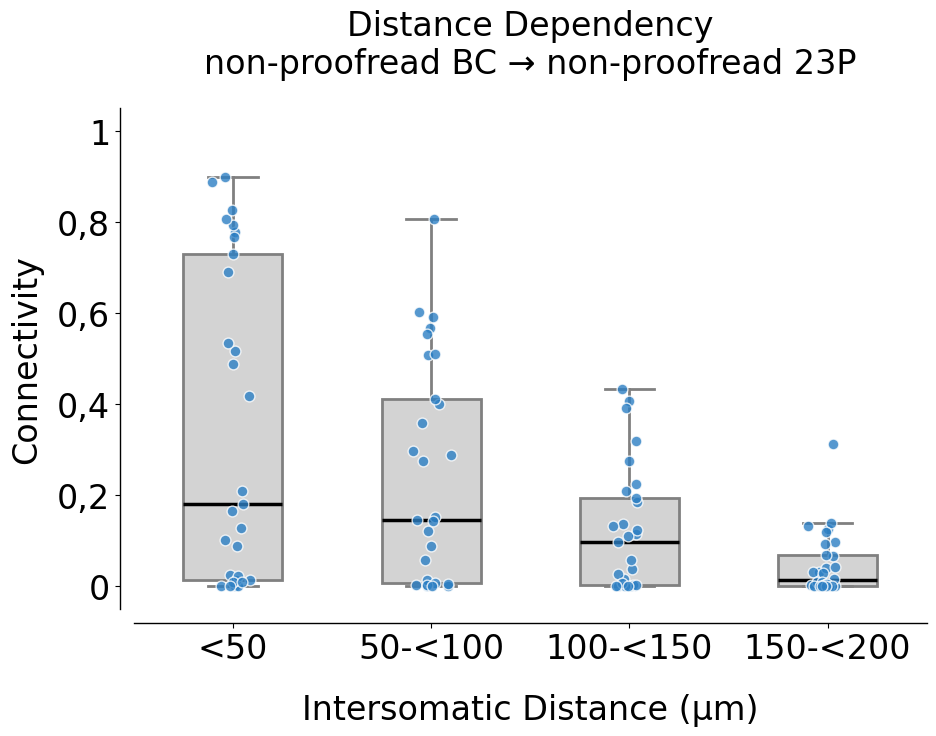

In [7]:
# BOXPLOT proofread

import random

#cell_type_two_list_ten = proofread_two_list
cell_type_two_list_ten = np.random.choice(cell_type_two_list, 30)
                                          
print(cell_type_two_list_ten)

list_of_center_ids = cell_type_two_list_ten

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]

results = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    
    try:
        coords, _, x_vox, y_vox, z_vox = coordinates_from_root_id(center_id)
    except Exception as e:
        print(f"  error with cell {center_id}: {e}")
        continue

    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], x_vox, y_vox, z_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error with {e}")
        continue

    for bin_name, r_min, r_max in bins:
        
        subset_df = all_neighbors_df[(all_neighbors_df['distance_um'] >= r_min) & (all_neighbors_df['distance_um'] < r_max)]
        
        target_ids = subset_df['pt_root_id'].tolist()
        n_targets = len(target_ids)
        
        if n_targets == 0:
            print(f"  Bin {bin_name}: empty: 0")
        else:
            output_syn_df = client.materialize.synapse_query(pre_ids=[center_id], post_ids=target_ids)
            
            if output_syn_df.empty:
                n_connections = 0
            else:
                n_connections = output_syn_df['post_pt_root_id'].nunique()

            connectivity = n_connections / n_targets
            results[bin_name].append(connectivity)
            
            print(f"  Bin {bin_name}: {n_targets} Targets -> {n_connections} Conn. ({connectivity:.4f})")

D = [results[bin_name] for bin_name, _, _ in bins]
positions = [1, 2, 3, 4]
plot_labels = [name for name, _, _ in bins]

for name, data in results.items():
    print(f"{name}: {len(data)} points {np.round(data, 3)}")

plt.style.use('default')

fig, ax = plt.subplots(figsize = (10, 8))

VP = ax.boxplot(D, positions = positions, widths = 0.5, patch_artist = True, 
                showmeans = False, showfliers = False,
                medianprops = {"color": "black", "linewidth": 2.5}, 
                boxprops = {"facecolor": "lightgrey", "edgecolor": "grey", "linewidth": 2}, 
                whiskerprops = {"color": "grey", "linewidth": 2}, 
                capprops = {"color": "grey", "linewidth": 2},
                zorder = 1) 

for i, data_points in enumerate(D):
    x_pos = positions[i]
    
    x_jitter = np.random.normal(x_pos, 0.04, size=len(data_points))
    
    ax.scatter(x_jitter, data_points, 
               alpha = 0.8,      
               s = 60,           
               color = '#2c7fc4',   
               edgecolor = 'white',
               zorder = 10)   

ax.set_title("Distance Dependency\nnon-proofread BC → non-proofread 23P", fontsize = 24, pad = 25)
ax.set_xlabel("Intersomatic Distance (µm)", fontsize = 24, labelpad = 20)
ax.set_ylabel("Connectivity", fontsize = 24, labelpad = 10)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

offset = 10 
ax.spines['left'].set_position(('outward', offset))
ax.spines['bottom'].set_position(('outward', offset))

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

y_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = ['0', '0,2', '0,4', '0,6', '0,8', '1']

ax.set_xlim(0.5, 4.5)
ax.set_xticks(positions)
ax.set_xticklabels(plot_labels, fontsize = 24)

ax.set_ylim(-0.05, 1.05)
ax.set_yticks(y_ticks) 
ax.set_yticklabels(y_labels, fontsize = 24)

ax.grid(False)

plt.tight_layout(pad=3.0) 
plt.savefig('noprtonprother.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [8]:
# connectivity within the radius

import random

cell_type_two_list_ten = [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]
#cell_type_two_list_ten = [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("25-100", 25, 100), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]

results = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    
    try:
        coords, _, x_vox, y_vox, z_vox = coordinates_from_root_id(center_id)
    except Exception as e:
        print(f"  error with cell {center_id}: {e}")
        continue

    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], x_vox, y_vox, z_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error with find_cells: {e}")
        continue

    for bin_name, r_min, r_max in bins:
        
        subset_df = all_neighbors_df[(all_neighbors_df['distance_um'] >= r_min) & (all_neighbors_df['distance_um'] < r_max)]
        
        target_ids = subset_df['pt_root_id'].tolist()
        n_targets = len(target_ids)
        
        if n_targets == 0:
            print(f"  Bin {bin_name}: empty (0 targets)")
        else:
            output_syn_df = client.materialize.synapse_query(pre_ids=[center_id], post_ids=target_ids)
            
            if output_syn_df.empty:
                n_connections = 0
            else:
                n_connections = output_syn_df['post_pt_root_id'].nunique()

            connectivity = n_connections / n_targets
            results[bin_name].append(connectivity)
            
            print(f"  Bin {bin_name}: {n_targets} Targets -> {n_connections} Conn. ({connectivity:.4f})")


print("CONNECTIVITY")

for bin_name, data in results.items():
    print(f"\radius: {bin_name} µm")
    
    rounded_data = np.round(data, 4)
    print(f"connectivities: {list(rounded_data)}")

    if len(data) > 0:
        mean_val = np.mean(data)
        print(f"average: {mean_val:.4f}")
    else:
        print("no data")

Selected Centers: [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]

Processing Center ID: 864691135579134981
microns: x=[616.74728606], y=[149.65697862], z=[821.36]
found: 4453 cells within radius of 0 μm to 200 μm
central cell: [864691135579134981]
  Bin 25-100: 840 Targets -> 29 Conn. (0.0345)
  Bin 50-<100: 738 Targets -> 28 Conn. (0.0379)
  Bin 100-<150: 1465 Targets -> 24 Conn. (0.0164)
  Bin 150-<200: 2138 Targets -> 2 Conn. (0.0009)

Processing Center ID: 864691135448017554
microns: x=[706.40164419], y=[159.55654162], z=[839.32]
found: 4449 cells within radius of 0 μm to 200 μm
central cell: [864691135448017554]
  Bin 25-100: 842 Targets -> 531 Conn. (0.6306)
  Bin 50-<100: 745 Targets -> 455 Conn. (0.6107)
  Bin 100-<150: 1478 Targets -> 561 Conn. (0.3796)
  Bin 150-<200: 2116 Targets -> 411 Conn. (0.1942)

Processing Center ID: 864691136138803837
microns: x=[634.77438221], y=[218.241126

In [9]:
cell_type_two_list_ten = [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("50-100", 50, 100), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]

results_connectivity = {name: [] for name, _, _ in bins}
results_reciprocity = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    
    try:
        coords, _, x_vox, y_vox, z_vox = coordinates_from_root_id(center_id)
    except Exception as e:
        print(f"  error with cell {center_id}: {e}")
        continue

    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], x_vox, y_vox, z_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error with find_cells: {e}")
        continue

    for bin_name, r_min, r_max in bins:
        
        subset_df = all_neighbors_df[(all_neighbors_df['distance_um'] >= r_min) & (all_neighbors_df['distance_um'] < r_max)]
        
        target_ids = subset_df['pt_root_id'].tolist()
        n_targets = len(target_ids)
        
        if n_targets == 0:
            print(f"  Bin {bin_name}: empty (0 targets)")
            continue 
            
        output_syn_df = client.materialize.synapse_query(pre_ids=[center_id], post_ids=target_ids)
        
        if output_syn_df.empty:
            n_connections_out = 0
            connected_targets_out = set()
        else:
            connected_targets_out = set(output_syn_df['post_pt_root_id'].unique())
            n_connections_out = len(connected_targets_out)

        connectivity = n_connections_out / n_targets
        results_connectivity[bin_name].append(connectivity)

        input_syn_df = client.materialize.synapse_query(pre_ids=target_ids, post_ids=[center_id])
        
        if input_syn_df.empty:
            n_connections_in = 0
            connected_sources_in = set()
        else:
            connected_sources_in = set(input_syn_df['pre_pt_root_id'].unique())
            n_connections_in = len(connected_sources_in)

        reciprocal_partners = connected_targets_out.intersection(connected_sources_in)
        n_reciprocal = len(reciprocal_partners)

        reciprocity_obs = n_reciprocal / n_targets
        results_reciprocity[bin_name].append(reciprocity_obs)

        prob_in = n_connections_in / n_targets
        reciprocity_chance = connectivity * prob_in
        
        print(f"  bin {bin_name}: {n_targets} targets")
        print(f" Connectivity (out): {n_connections_out} ({connectivity:.4f})")
        print(f" Input (in): {n_connections_in} ({prob_in:.4f})")
        print(f" Reciprocity (observed): {n_reciprocal} ({reciprocity_obs:.4f}) vs chance: {reciprocity_chance:.4f}")

for bin_name, data in results_connectivity.items():
    if len(data) > 0:
        mean_val = np.mean(data)
        print(f"Radius {bin_name} µm: Mean = {mean_val:.4f} (n={len(data)})")
    else:
        print(f"Radius {bin_name} µm: no data")

for bin_name, data in results_reciprocity.items():
    if len(data) > 0:
        mean_val = np.mean(data)
        print(f"Radius {bin_name} µm: Mean = {mean_val:.4f} (n={len(data)})")
    else:
        print(f"Radius {bin_name} µm: no data")

Selected Centers: [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]

Processing Center ID: 864691135579134981
microns: x=[616.74728606], y=[149.65697862], z=[821.36]
found: 4453 cells within radius of 0 μm to 200 μm
central cell: [864691135579134981]
  bin 50-100: 738 targets
 Connectivity (out): 28 (0.0379)
 Input (in): 19 (0.0257)
 Reciprocity (observed): 1 (0.0014) vs chance: 0.0010
  bin 50-<100: 738 targets
 Connectivity (out): 28 (0.0379)
 Input (in): 19 (0.0257)
 Reciprocity (observed): 1 (0.0014) vs chance: 0.0010
  bin 100-<150: 1465 targets
 Connectivity (out): 24 (0.0164)
 Input (in): 8 (0.0055)
 Reciprocity (observed): 0 (0.0000) vs chance: 0.0001
  bin 150-<200: 2138 targets
 Connectivity (out): 2 (0.0009)
 Input (in): 3 (0.0014)
 Reciprocity (observed): 0 (0.0000) vs chance: 0.0000

Processing Center ID: 864691135448017554
microns: x=[706.40164419], y=[159.55654162], z=[839.32]
foun

In [10]:
from functions import find_cells_in_radius, coordinates_from_root_id

cell_type_two_list_ten = [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]

results_connectivity = {name: [] for name, _, _ in bins}
results_reciprocity = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    
    try:
        coords, _, x_vox, y_vox, z_vox = coordinates_from_root_id(center_id)
    except Exception as e:
        print(f"  error with cell {center_id}: {e}")
        continue

    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], x_vox, y_vox, z_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error with find_cells: {e}")
        continue

    for bin_name, r_min, r_max in bins:
        
        subset_df = all_neighbors_df[(all_neighbors_df['distance_um'] >= r_min) & (all_neighbors_df['distance_um'] < r_max)]
        
        target_ids = subset_df['pt_root_id'].tolist()
        n_targets = len(target_ids)
        
        if n_targets == 0:
            print(f"  Bin {bin_name}: empty (0 targets)")
        else:
            output_syn_df = client.materialize.synapse_query(pre_ids=[center_id], post_ids=target_ids)
            
            if output_syn_df.empty:
                unique_outputs = set()
            else:
                unique_outputs = set(output_syn_df['post_pt_root_id'].unique())
            
            n_connections_out = len(unique_outputs)

            input_syn_df = client.materialize.synapse_query(pre_ids=target_ids, post_ids=[center_id])
            
            if input_syn_df.empty:
                unique_inputs = set()
            else:
                unique_inputs = set(input_syn_df['pre_pt_root_id'].unique())

            reciprocal_set = unique_outputs.intersection(unique_inputs)
            n_reciprocal = len(reciprocal_set)

            connectivity_val = n_connections_out / n_targets
            reciprocity_val = n_reciprocal / n_targets
            
            results_connectivity[bin_name].append(connectivity_val)
            results_reciprocity[bin_name].append(reciprocity_val)
            
            print(f"  Bin {bin_name}: {n_targets} Targets | Out: {n_connections_out} ({connectivity_val:.2%}) | Recip: {n_reciprocal} ({reciprocity_val:.2%})")


for bin_name, data in results_connectivity.items():
    print(f"\nradius: {bin_name} µm")
    if len(data) > 0:
        mean_val = np.mean(data)
        std_val = np.std(data)
        print(f"  average: {mean_val:.4f} ± {std_val:.4f}")
        print(f"  values: {list(np.round(data, 4))}")
    else:
        print("no data")

for bin_name, data in results_reciprocity.items():
    print(f"\nradius: {bin_name} µm")
    if len(data) > 0:
        mean_val = np.mean(data)
        std_val = np.std(data)
        print(f"  average: {mean_val:.4f} ± {std_val:.4f}")
        print(f"  values: {list(np.round(data, 4))}")
        
        conn_data = results_connectivity[bin_name]
        ratios = []
        for c, r in zip(conn_data, data):
            if c > 0:
                ratios.append(r/c)
        if ratios:
            print(f"  Conditional Reciprocity (Recip / Connected): {np.mean(ratios):.4f}")

    else:
        print("no data")

Selected Centers: [864691135579134981, 864691135448017554, 864691136138803837, 864691136005322698, 864691136619344859, 864691136010404012, 864691135939380228]

Processing Center ID: 864691135579134981
microns: x=[616.74728606], y=[149.65697862], z=[821.36]
found: 4453 cells within radius of 0 μm to 200 μm
central cell: [864691135579134981]
  Bin <50: 112 Targets | Out: 1 (0.89%) | Recip: 0 (0.00%)
  Bin 50-<100: 738 Targets | Out: 28 (3.79%) | Recip: 1 (0.14%)
  Bin 100-<150: 1465 Targets | Out: 24 (1.64%) | Recip: 0 (0.00%)
  Bin 150-<200: 2138 Targets | Out: 2 (0.09%) | Recip: 0 (0.00%)

Processing Center ID: 864691135448017554
microns: x=[706.40164419], y=[159.55654162], z=[839.32]
found: 4449 cells within radius of 0 μm to 200 μm
central cell: [864691135448017554]
  Bin <50: 110 Targets | Out: 88 (80.00%) | Recip: 50 (45.45%)
  Bin 50-<100: 745 Targets | Out: 455 (61.07%) | Recip: 108 (14.50%)
  Bin 100-<150: 1478 Targets | Out: 561 (37.96%) | Recip: 25 (1.69%)
  Bin 150-<200: 2116

In [12]:
#y-change

from functions import get_center_coords_um, voxels_to_um

list_of_center_ids = proofread_two_list 

all_dy_values = []

for center_id in list_of_center_ids:
    try:
        center_pos_um, cx_vox, cy_vox, cz_vox = get_center_coords_um(center_id)
        cx, cy, cz = center_pos_um
    except Exception:
        continue

    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], cx_vox, cy_vox, cz_vox, 0, 200, proofread_one_df)
    except Exception:
        continue

    if all_neighbors_df.empty:
        continue

    neighbor_ids = all_neighbors_df['pt_root_id'].tolist()
    try:
        syn_df = client.materialize.synapse_query(pre_ids=[center_id], post_ids = neighbor_ids)
        if syn_df.empty:
            continue
        
        connected_ids = set(syn_df['post_pt_root_id'].tolist())
        connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(connected_ids)].copy()
    except:
        continue

    if connected_df.empty:
        continue

    ny_vox = connected_df['pt_position_y'].values
    _, ny_um, _ = voxels_to_um(connected_df['pt_position_x'].values, ny_vox, connected_df['pt_position_z'].values)

    for y_target in ny_um:
        dy = y_target - cy
        all_dy_values.append(dy)

if not all_dy_values:
    print("no connections found")
else:
    mean_dy = np.mean(all_dy_values)
    
    print(f"count connections: {len(all_dy_values)}")
    print(f"y change:   {mean_dy:.4f} µm")
    
    if mean_dy > 0:
        print("-> lower than center")
    else:
        print("-> higher than center")

microns: x=[687.0523098], y=[153.81629262], z=[820.48]
microns: x=[687.0523098], y=[153.81629262], z=[820.48]
found: 393 cells within radius of 0 μm to 200 μm
central cell: [864691136005322698]
microns: x=[699.11098016 682.20699225 667.94774129 669.2078129  692.39669656
 663.78125947 701.12748783 699.01722415 712.62171403 663.96354045
 673.99706166 680.16505138 716.37403905 720.85282923 676.85170949
 688.86257696 708.74109576 669.79991562 648.93554158 663.44551198
 718.89010716 657.66693972 656.48524876 692.71703953 706.2154902
 701.74701781 669.25220536 685.12577211 650.14468898 661.90720667
 711.07086559 690.68648588 710.77014657 676.11524431 666.07449799
 696.93276925 659.65180019 686.40234635 658.36152691 721.98738199
 728.19022671 653.73166904 640.18345006 691.47089824 706.3107204
 709.45345712 719.12967066 674.6418519  695.25244247 694.40473622
 689.85328765 684.83918606 641.73880702 677.63993704 665.83366241
 715.61390345 639.38903767 654.62619573 650.12737686 642.11935172
 639.

Selected Centers: [864691135989331971]

Processing Center ID: 864691135989331971
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
found: 4312 cells within radius of 0 μm to 200 μm
central cell: [864691135989331971]
microns: x=[487.07306116 498.68147682 484.30670702 465.9914355  470.89828416
 460.14000274 478.27946722 504.07936008 459.03310853 491.16200047
 494.35306048 490.60030206 512.33975231 460.28107041 499.31909925
 484.28971318 476.2320062  480.4636895  486.05977866 447.23342349
 507.36741306 457.67558135 445.61072616 506.1548844  497.72328013
 455.20220074 454.08062451 503.80407425 460.78386782 517.89693999
 482.75435574 491.39141965 464.18348016 511.45195949 502.67324969
 479.07171208 521.92547546 470.9909129  502.99107819 467.30393418
 497.64302106 493.38211855 475.32311525 462.61271866 460.82034131
 517.17703525 506.87377752 503.56086903 456.47285007 471.23952262
 506.18866996 483.6125824  476.03648823 470.6976216

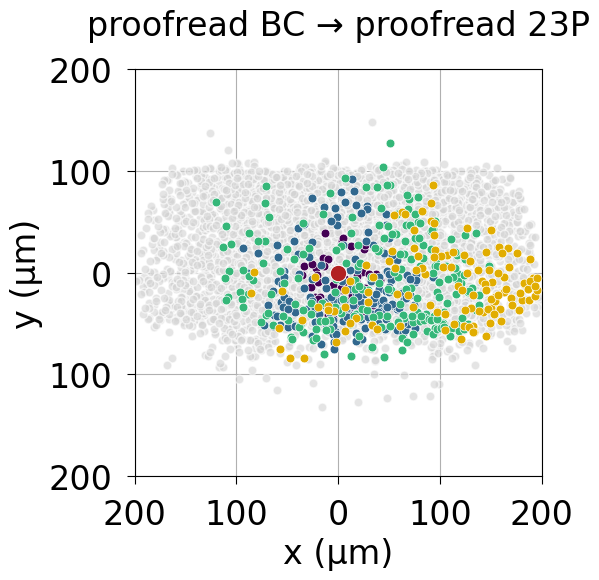

In [13]:
# front view
from functions import get_center_coords_um, voxels_to_um



#cell_type_two_list_ten = [864691136007059658] # proofread BC

cell_type_two_list_ten = [864691135989331971] # non-proofread BC

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]
#bin_colors = {"<50": '#440154', "50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#FDE725"}

bin_colors = {"<50": '#440154',"50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#E1AD01"}

points_by_bin = {name: [] for name, _, _ in bins}
not_points_by_bin = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    try:
        center_pos_um, cx_vox, cy_vox, cz_vox = get_center_coords_um(center_id)
    except Exception as e:
        print(f"  error {center_id}: {e}")
        continue
        
    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], cx_vox, cy_vox, cz_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error {e}")
        continue

    if all_neighbors_df.empty:
        continue
        
    neighbor_ids = all_neighbors_df['pt_root_id'].tolist()
    
    try:
        syn_df = client.materialize.synapse_query(pre_ids = [center_id], post_ids = neighbor_ids)
        
        if syn_df.empty:
            continue
            
        connected_ids = set(syn_df['post_pt_root_id'].tolist())
        connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(connected_ids)].copy()
        not_connected_ids = set(neighbor_ids) - connected_ids
        not_connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(not_connected_ids)].copy()
        
    except Exception as e:
        print(f"  Synapse query error: {e}")
        continue
        
    if connected_df.empty:
        continue
    try:
        nx_vox = connected_df['pt_position_x'].values
        ny_vox = connected_df['pt_position_y'].values
        nz_vox = connected_df['pt_position_z'].values

        nx_um, ny_um, nz_um = voxels_to_um(nx_vox, ny_vox, nz_vox)
        
        cx, cy, cz = center_pos_um

        not_nx_vox = not_connected_df['pt_position_x'].values
        not_ny_vox = not_connected_df['pt_position_y'].values
        not_nz_vox = not_connected_df['pt_position_z'].values

        not_nx_um, not_ny_um, not_nz_um = voxels_to_um(not_nx_vox, not_ny_vox, not_nz_vox)
        
        cx, cy, cz = center_pos_um
        
        for i in range(len(nx_um)):
            dx = nx_um[i] - cx
            dy = ny_um[i] - cy
            dz = nz_um[i] - cz
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)

            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    points_by_bin[bin_name].append([dx, dy])
                    break

        for i in range(len(not_nx_um)):
            dx = not_nx_um[i] - cx
            dy = not_ny_um[i] - cy
            dz = not_nz_um[i] - cz
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)
            
            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    not_points_by_bin[bin_name].append([dx, dy])
                    break
                    
    except Exception as e:
        print(f"  Calculation error: {e}")
        continue

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize = (6, 6))

for bin_name, _, _ in bins:
    coords = points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)
        ax.scatter(arr[:, 0], arr[:, 1], s = 40, c = bin_colors[bin_name], alpha = 1, edgecolors = 'white', linewidth = 0.5, label = f"{bin_name} µm", zorder = 5)

for bin_name in not_points_by_bin:
    coords = not_points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)
        ax.scatter(arr[:, 0], arr[:, 1], s = 40, c ='lightgrey', alpha = 0.6, edgecolors = 'white', label = f" Not connected", zorder = 1) # hier eigebtlich lightgray als color
        
ax.scatter(0, 0, s = 140, c = 'firebrick', linewidth = 0.75, label = 'Center BC', zorder = 20, edgecolors = 'white')

limit = 200
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit) 
ax.set_xlabel("x (µm)", fontsize = 24)
ax.set_ylabel("y (µm)", fontsize = 24)

ticks = [-200, -100, 0, 100, 200]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
labels = ["200", "100", "0", "100", "200"]
ax.set_xticklabels(labels, fontsize = 24)
ax.set_yticklabels(labels, fontsize = 24)

ax.tick_params(axis = 'x', pad = 10)
ax.tick_params(axis = 'y', pad = 10)
#ax.tick_params(axis='z', pad=10)

ax.tick_params(direction = 'out', length = 6)
ax.set_aspect('equal')

ax.set_title("proofread BC → proofread 23P", fontsize = 24, pad = 10, y = 1.05)
plt.tight_layout()
plt.savefig('einsvorne.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Selected Centers: [864691135989331971]
Selected Centers: [864691135989331971]

Processing Center ID: 864691135989331971
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
found: 4312 cells within radius of 0 μm to 200 μm
central cell: [864691135989331971]
microns: x=[487.07306116 498.68147682 484.30670702 465.9914355  470.89828416
 460.14000274 478.27946722 504.07936008 459.03310853 491.16200047
 494.35306048 490.60030206 512.33975231 460.28107041 499.31909925
 484.28971318 476.2320062  480.4636895  486.05977866 447.23342349
 507.36741306 457.67558135 445.61072616 506.1548844  497.72328013
 455.20220074 454.08062451 503.80407425 460.78386782 517.89693999
 482.75435574 491.39141965 464.18348016 511.45195949 502.67324969
 479.07171208 521.92547546 470.9909129  502.99107819 467.30393418
 497.64302106 493.38211855 475.32311525 462.61271866 460.82034131
 517.17703525 506.87377752 503.56086903 456.47285007 471.23952262
 506.1886699

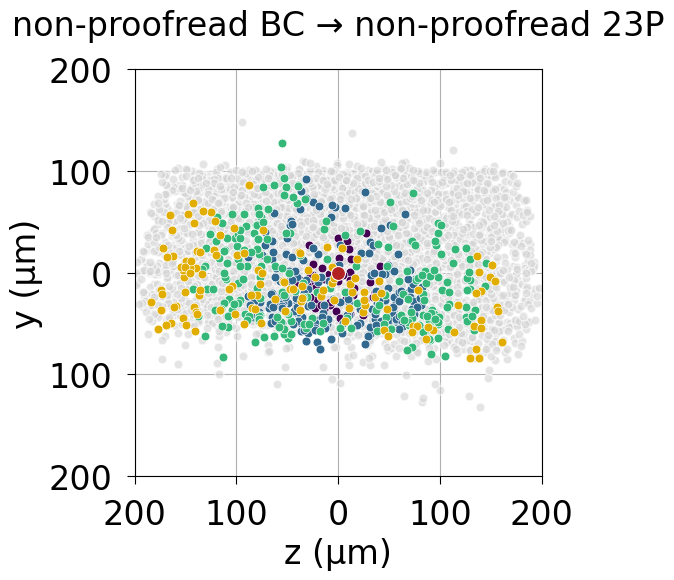

In [14]:
# side view (YZ-Ansicht)

from functions import get_center_coords_um, voxels_to_um

#cell_type_two_list_ten = [864691136010404012] # proofread BC

cell_type_two_list_ten = [864691135989331971] # non-proofread BC

print(f"Selected Centers: {cell_type_two_list_ten}")

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]
#bin_colors = {"<50": '#440154', "50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#FDE725"}

bin_colors = {"<50": '#440154',"50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#E1AD01"}


points_by_bin = {name: [] for name, _, _ in bins}
not_points_by_bin = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    try:
        center_pos_um, cx_vox, cy_vox, cz_vox = get_center_coords_um(center_id)
    except Exception as e:
        print(f"  error {center_id}: {e}")
        continue
        
    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], cx_vox, cy_vox, cz_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error {e}")
        continue

    if all_neighbors_df.empty:
        continue
        
    neighbor_ids = all_neighbors_df['pt_root_id'].tolist()
    
    try:
        syn_df = client.materialize.synapse_query(pre_ids = [center_id], post_ids = neighbor_ids)
        
        if syn_df.empty:
            continue
            
        connected_ids = set(syn_df['post_pt_root_id'].tolist())
        connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(connected_ids)].copy()
        not_connected_ids = set(neighbor_ids) - connected_ids
        not_connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(not_connected_ids)].copy()
        
    except Exception as e:
        print(f"  Synapse query error: {e}")
        continue
        
    if connected_df.empty:
        continue

    try:
        nx_vox = connected_df['pt_position_x'].values
        ny_vox = connected_df['pt_position_y'].values
        nz_vox = connected_df['pt_position_z'].values
        nx_um, ny_um, nz_um = voxels_to_um(nx_vox, ny_vox, nz_vox)
        
        not_nx_vox = not_connected_df['pt_position_x'].values
        not_ny_vox = not_connected_df['pt_position_y'].values
        not_nz_vox = not_connected_df['pt_position_z'].values
        not_nx_um, not_ny_um, not_nz_um = voxels_to_um(not_nx_vox, not_ny_vox, not_nz_vox)
        
        cx, cy, cz = center_pos_um

        for i in range(len(nx_um)):
            dx = nx_um[i] - cx
            dy = ny_um[i] - cy
            dz = nz_um[i] - cz
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)

            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    points_by_bin[bin_name].append([dz, dy]) 
                    break

        for i in range(len(not_nx_um)):
            dx = not_nx_um[i] - cx
            dy = not_ny_um[i] - cy
            dz = not_nz_um[i] - cz
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)
            
            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    not_points_by_bin[bin_name].append([dz, dy])
                    break
                    
    except Exception as e:
        print(f"  Calculation error: {e}")
        continue

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize = (6, 6))

for bin_name, _, _ in bins:
    coords = points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)
        ax.scatter(arr[:, 0], arr[:, 1], s = 40, c = bin_colors[bin_name], alpha = 1, edgecolors = 'white', linewidth = 0.5, label = f"{bin_name} µm", zorder = 5)

for bin_name in not_points_by_bin:
    coords = not_points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)
        ax.scatter(arr[:, 0], arr[:, 1], s = 40, c ='lightgrey', alpha = 0.6, edgecolors = 'white', label = f" Not connected", zorder = 1)
        
ax.scatter(0, 0, s = 100, c = 'firebrick', linewidth = 0.75, label = 'Center BC', zorder = 20, edgecolors = 'white')

limit = 200
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit) 

ax.set_xlabel("z (µm)", fontsize = 24)
ax.set_ylabel("y (µm)", fontsize = 24)

ticks = [-200, -100, 0, 100, 200]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
labels = ["200", "100", "0", "100", "200"]
ax.set_xticklabels(labels, fontsize = 24)
ax.set_yticklabels(labels, fontsize = 24)

ax.tick_params(axis = 'x', pad = 10)
ax.tick_params(axis = 'y', pad = 10)

ax.tick_params(direction = 'out', length = 6)
ax.set_aspect('equal')

ax.set_title("non-proofread BC → non-proofread 23P", fontsize = 24, pad = 10, y = 1.05)
plt.tight_layout()
plt.savefig('dreiseite.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Selected Centers: [864691135989331971]
Selected Centers: [864691135989331971]

Processing Center ID: 864691135989331971
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
found: 4312 cells within radius of 0 μm to 200 μm
central cell: [864691135989331971]
microns: x=[487.07306116 498.68147682 484.30670702 465.9914355  470.89828416
 460.14000274 478.27946722 504.07936008 459.03310853 491.16200047
 494.35306048 490.60030206 512.33975231 460.28107041 499.31909925
 484.28971318 476.2320062  480.4636895  486.05977866 447.23342349
 507.36741306 457.67558135 445.61072616 506.1548844  497.72328013
 455.20220074 454.08062451 503.80407425 460.78386782 517.89693999
 482.75435574 491.39141965 464.18348016 511.45195949 502.67324969
 479.07171208 521.92547546 470.9909129  502.99107819 467.30393418
 497.64302106 493.38211855 475.32311525 462.61271866 460.82034131
 517.17703525 506.87377752 503.56086903 456.47285007 471.23952262
 506.1886699

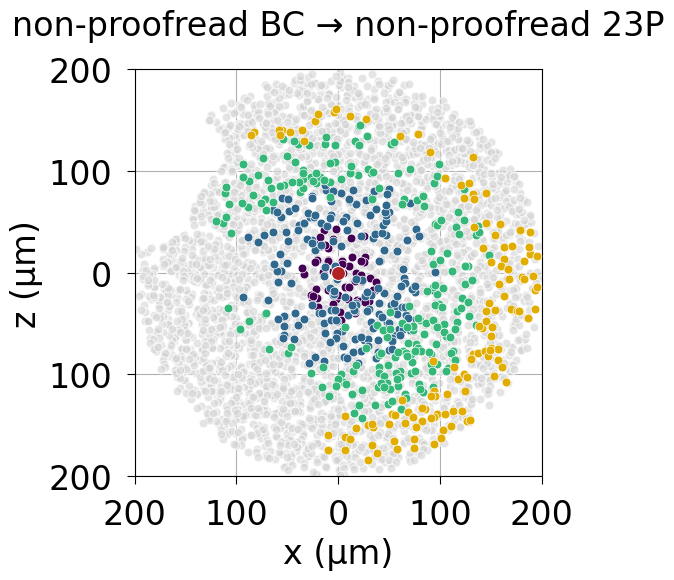

In [15]:
# top view (XZ-Ansicht)

from functions import get_center_coords_um, voxels_to_um

#cell_type_two_list_ten = [864691136010404012] # proofread BC

cell_type_two_list_ten = [864691135989331971] # non-proofread BC

print(f"Selected Centers: {cell_type_two_list_ten}")

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]
#bin_colors = {"<50": '#440154', "50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#FDE725"}

bin_colors = {"<50": '#440154',"50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#E1AD01"}

points_by_bin = {name: [] for name, _, _ in bins}
not_points_by_bin = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    try:
        center_pos_um, cx_vox, cy_vox, cz_vox = get_center_coords_um(center_id)
    except Exception as e:
        print(f"  error {center_id}: {e}")
        continue
        
    max_radius = 200
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], cx_vox, cy_vox, cz_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error {e}")
        continue

    if all_neighbors_df.empty:
        continue
        
    neighbor_ids = all_neighbors_df['pt_root_id'].tolist()
    
    try:
        syn_df = client.materialize.synapse_query(pre_ids = [center_id], post_ids = neighbor_ids)
        
        if syn_df.empty:
            continue
            
        connected_ids = set(syn_df['post_pt_root_id'].tolist())
        connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(connected_ids)].copy()
        not_connected_ids = set(neighbor_ids) - connected_ids
        not_connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(not_connected_ids)].copy()
        
    except Exception as e:
        print(f"  Synapse query error: {e}")
        continue
        
    if connected_df.empty:
        continue

    try:
        nx_vox = connected_df['pt_position_x'].values
        ny_vox = connected_df['pt_position_y'].values
        nz_vox = connected_df['pt_position_z'].values
        nx_um, ny_um, nz_um = voxels_to_um(nx_vox, ny_vox, nz_vox)
        
        not_nx_vox = not_connected_df['pt_position_x'].values
        not_ny_vox = not_connected_df['pt_position_y'].values
        not_nz_vox = not_connected_df['pt_position_z'].values
        not_nx_um, not_ny_um, not_nz_um = voxels_to_um(not_nx_vox, not_ny_vox, not_nz_vox)
        
        cx, cy, cz = center_pos_um

        for i in range(len(nx_um)):
            dx = nx_um[i] - cx
            dy = ny_um[i] - cy
            dz = nz_um[i] - cz
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)

            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    # XZ-Ansicht: dx auf X, dz auf Y
                    points_by_bin[bin_name].append([dx, dz]) 
                    break

        for i in range(len(not_nx_um)):
            dx = not_nx_um[i] - cx
            dy = not_ny_um[i] - cy
            dz = not_nz_um[i] - cz
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)
            
            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    not_points_by_bin[bin_name].append([dx, dz])
                    break
                    
    except Exception as e:
        print(f"  Calculation error: {e}")
        continue

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize = (6, 6))

for bin_name, _, _ in bins:
    coords = points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)
        ax.scatter(arr[:, 0], arr[:, 1], s = 40, c = bin_colors[bin_name], alpha = 1, edgecolors = 'white', linewidth = 0.5, label = f"{bin_name} µm", zorder = 5)

for bin_name in not_points_by_bin:
    coords = not_points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)
        ax.scatter(arr[:, 0], arr[:, 1], s = 40, c ='lightgrey', alpha = 0.6, edgecolors = 'white', label = f" Not connected", zorder = 1)
        
ax.scatter(0, 0, s = 100, c = 'firebrick', linewidth = 0.75, label = 'Center BC', zorder = 20, edgecolors = 'white')

limit = 200
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit) 

ax.set_xlabel("x (µm)", fontsize = 24)
ax.set_ylabel("z (µm)", fontsize = 24)

ticks = [-200, -100, 0, 100, 200]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
labels = ["200", "100", "0", "100", "200"]
ax.set_xticklabels(labels, fontsize = 24)
ax.set_yticklabels(labels, fontsize = 24)

ax.tick_params(axis = 'x', pad = 10)
ax.tick_params(axis = 'y', pad = 10)

ax.tick_params(direction = 'out', length = 6)
ax.set_aspect('equal')

ax.set_title("non-proofread BC → non-proofread 23P", fontsize = 24, pad = 10, y = 1.05)
plt.tight_layout()
plt.savefig('dreioben.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Selected Centers: [864691135989331971]
Selected Centers: [864691135989331971]

Processing Center ID: 864691135989331971
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
microns: x=[480.79391685], y=[147.59200389], z=[834.84]
found: 7973 cells within radius of 0 μm to 300 μm
central cell: [864691135989331971]
microns: x=[487.07306116 498.68147682 484.30670702 465.9914355  470.89828416
 460.14000274 478.27946722 504.07936008 459.03310853 491.16200047
 494.35306048 490.60030206 512.33975231 460.28107041 499.31909925
 484.28971318 476.2320062  480.4636895  486.05977866 447.23342349
 507.36741306 457.67558135 445.61072616 506.1548844  497.72328013
 455.20220074 454.08062451 503.80407425 460.78386782 517.89693999
 482.75435574 491.39141965 464.18348016 511.45195949 502.67324969
 479.07171208 521.92547546 470.9909129  502.99107819 467.30393418
 497.64302106 493.38211855 475.32311525 462.61271866 460.82034131
 517.17703525 506.87377752 503.56086903 456.47285007 471.23952262
 506.1886699

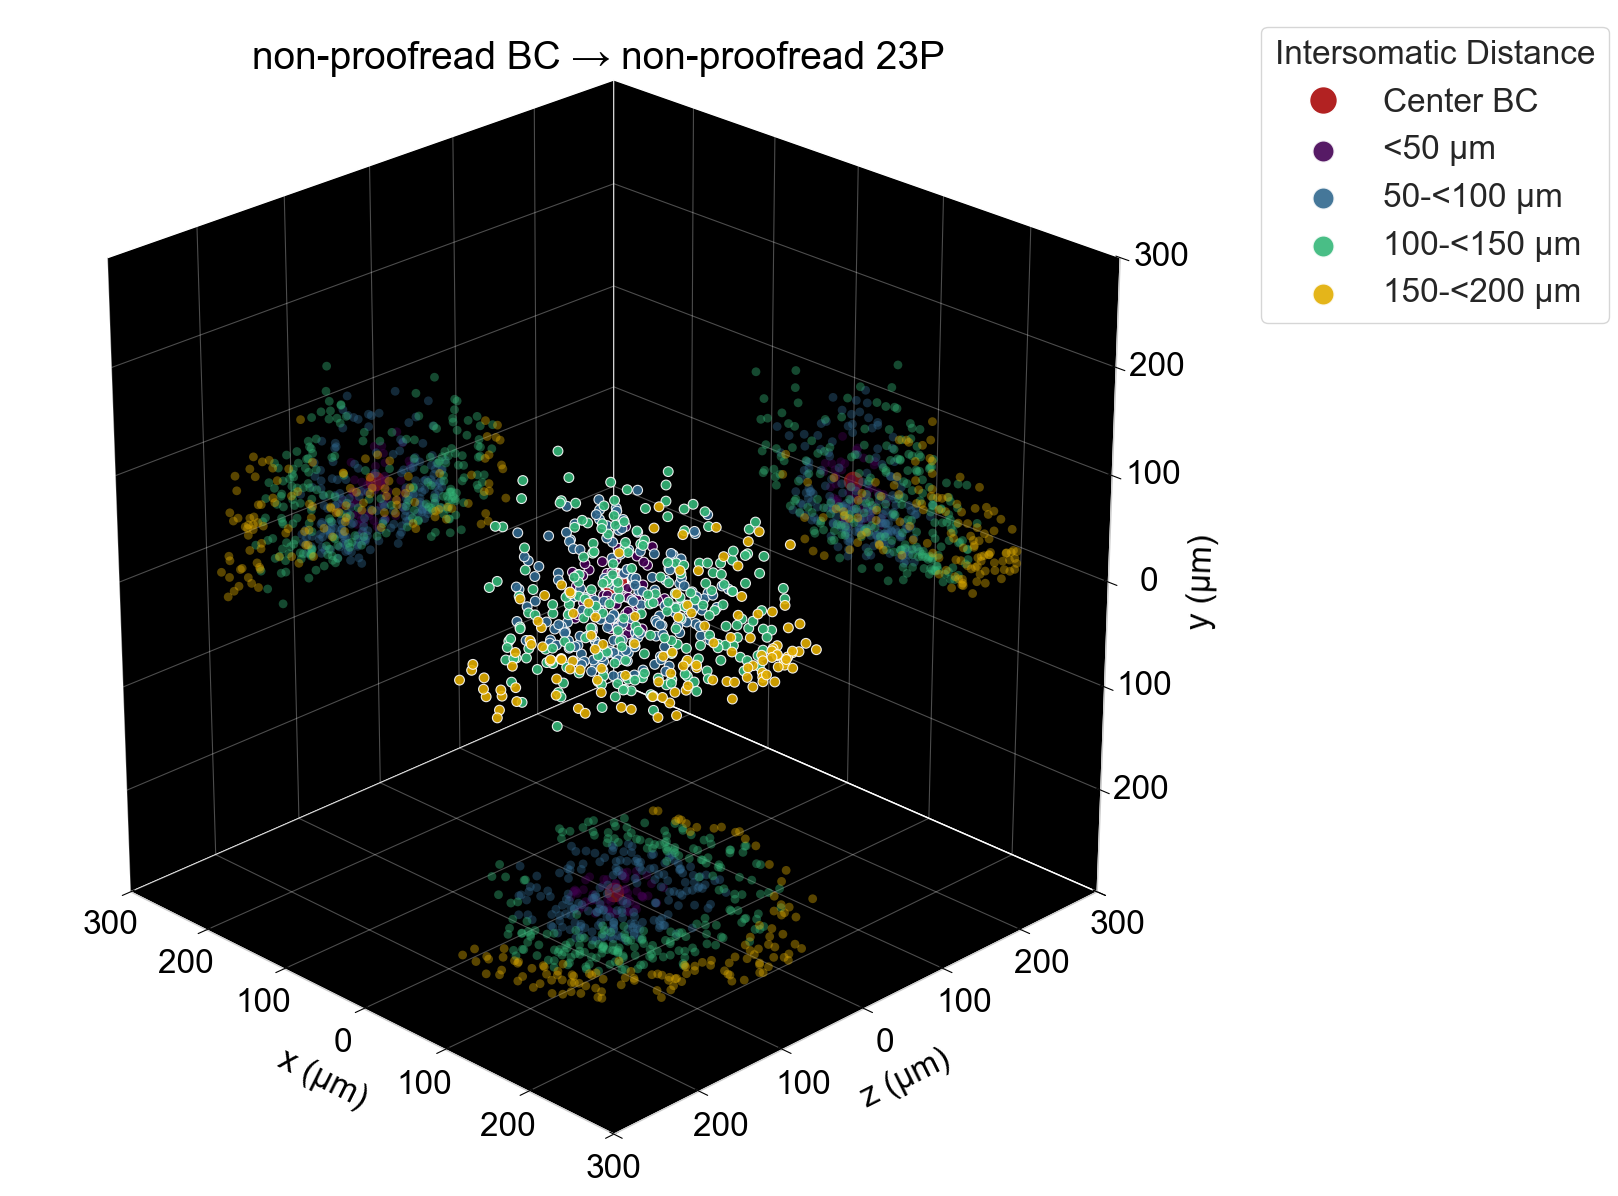

In [16]:
# final 3D Plot

from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.lines import Line2D
from functions import coordinates_from_root_id, voxels_to_um, find_cells_in_radius, get_center_coords_um


#cell_type_two_list_ten = [864691136010404012] # proofread BC

cell_type_two_list_ten = [864691135989331971] # non-proofread BC

print(f"Selected Centers: {cell_type_two_list_ten}")

print(f"Selected Centers: {cell_type_two_list_ten}")

list_of_center_ids = cell_type_two_list_ten

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]

#bin_colors = {"<50": '#333333',"50-<100": "#787878", "100-<150": "#B8B8B8", "150-<200": "#EBEBEB"}
bin_colors = {"<50": '#440154',"50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#E1AD01"}


points_by_bin = {name: [] for name, _, _ in bins}

for center_id in list_of_center_ids:
    print(f"\nProcessing Center ID: {center_id}")
    try:
        center_pos_um, cx_vox, cy_vox, cz_vox = get_center_coords_um(center_id)
    except Exception as e:
        print(f"  error retrieving center {center_id}: {e}")
        continue

    max_radius = 300 
    min_radius = 0
    
    try:
        all_neighbors_df, _ = find_cells_in_radius(client, [center_id], cx_vox, cy_vox, cz_vox, min_radius, max_radius, cell_type_one_df)
    except Exception as e:
        print(f"  error with find_cells: {e}")
        continue

    if all_neighbors_df.empty:
        continue
        
    neighbor_ids = all_neighbors_df['pt_root_id'].tolist()
    
    try:
        syn_df = client.materialize.synapse_query(pre_ids = [center_id], post_ids = neighbor_ids)
        if syn_df.empty:
            continue
            
        connected_ids = set(syn_df['post_pt_root_id'].tolist())
        connected_df = all_neighbors_df[all_neighbors_df['pt_root_id'].isin(connected_ids)].copy()
        
    except Exception as e:
        print(f"  Synapse query error: {e}")
        continue
        
    if connected_df.empty:
        continue

    try:
        nx_vox = connected_df['pt_position_x'].values
        ny_vox = connected_df['pt_position_y'].values
        nz_vox = connected_df['pt_position_z'].values

        nx_um, ny_um, nz_um = voxels_to_um(nx_vox, ny_vox, nz_vox)
        
        cx, cy, cz = center_pos_um
        
        for i in range(len(nx_um)):
            dx = nx_um[i] - cx
            dy = ny_um[i] - cy
            dz = nz_um[i] - cz
            
            dist_3d = np.sqrt(dx**2 + dy**2 + dz**2)

            for bin_name, r_min, r_max in bins:
                if r_min <= dist_3d < r_max:
                    points_by_bin[bin_name].append([dx, dy, dz])
                    break
                    
    except Exception as e:
        print(f"  Calculation error: {e}")
        continue

plt.style.use('seaborn-v0_8-whitegrid') 

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

black_solid = (0.0, 0.0, 0.0, 1.0)

ax.xaxis.set_pane_color(black_solid)
ax.yaxis.set_pane_color(black_solid)
ax.zaxis.set_pane_color(black_solid)

ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True

ax.xaxis._axinfo["grid"]['color'] =  (1, 1, 1, 0.3) 
ax.yaxis._axinfo["grid"]['color'] =  (1, 1, 1, 0.3)
ax.zaxis._axinfo["grid"]['color'] =  (1, 1, 1, 0.3)

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')


limit = 300
wall_x = -limit
wall_y = limit
wall_z = -limit

ax.scatter(0, 0, 0, s = 400, c = 'firebrick', linewidth = 2, label = 'Center BC', zorder = 20, edgecolors = 'white')

ax.scatter(0, 0, np.full_like(0, wall_z), s = 200, c = 'firebrick', linewidth = 0, alpha = 0.6, zorder = 20)
ax.scatter(np.full_like(0, wall_x), 0, 0, s = 200, c = 'firebrick', linewidth = 0, alpha = 0.6, zorder = 20)
ax.scatter(0, np.full_like(0, wall_y), 0, s = 200, c = 'firebrick', linewidth = 0, alpha = 0.6, zorder = 20)

for bin_name, _, _ in bins:
    coords = points_by_bin[bin_name]
    if len(coords) > 0:
        arr = np.array(coords)

        x_plot = arr[:, 0] 
        y_plot = arr[:, 2]
        z_plot = arr[:, 1] 

        ax.scatter(x_plot, y_plot, z_plot, s = 50, c = bin_colors[bin_name], alpha = 0.9, edgecolors = 'white', linewidth = 0.8, label = f"{bin_name} µm", zorder = 10)
        
        ax.scatter(x_plot, y_plot, np.full_like(z_plot, wall_z), c = bin_colors[bin_name], alpha = 0.4, s = 40, zorder = 1, edgecolors = 'none')
        ax.scatter(np.full_like(x_plot, wall_x), y_plot, z_plot, c = bin_colors[bin_name], alpha = 0.4, s = 40, zorder = 1, edgecolors = 'none')
        ax.scatter(x_plot, np.full_like(y_plot, wall_y), z_plot, c = bin_colors[bin_name], alpha = 0.4, s = 40, zorder = 1, edgecolors = 'none')

ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit) 
ax.set_zlim(-limit, limit)

label_font = {'size': 24, 'weight': 'normal', 'color': 'black'}
ax.set_xlabel("x (µm)", fontdict = label_font, labelpad = 15)
ax.set_ylabel("z (µm)", fontdict = label_font, labelpad = 15) 
ax.set_zlabel("y (µm)", fontdict = label_font, labelpad = 21) 

ticks_loc = [-300, -200, -100, 0, 100, 200, 300]

partial_labelsx = ["300", "200", "100", "0", "100", "200", ""] 
partial_labelsy = ["", "200", "100", "0", "100", "200", "300"] 
full_labels     = ["", "200", "100", "0", "100", "200", "300"]

ax.set_xticks(ticks_loc)
ax.set_yticks(ticks_loc)
ax.set_zticks(ticks_loc)

ax.text(limit + 40, -limit - 40, -limit, "300", fontsize = 24, color = 'black', ha = 'center', va = 'center')

ax.set_xticklabels(partial_labelsx, fontsize = 24, verticalalignment = 'center', color='black')
ax.set_yticklabels(full_labels, fontsize = 24, verticalalignment = 'center', color='black')
ax.set_zticklabels(partial_labelsy, fontsize = 24, verticalalignment = 'center', color='black')

ax.tick_params(axis='x', pad = 10, colors='black')
ax.tick_params(axis='y', pad = 10, colors='black')
ax.tick_params(axis='z', pad = 10, colors='black')

ax.set_box_aspect([1, 1, 1]) 
ax.view_init(elev = 25, azim = -45)

handles, labels = ax.get_legend_handles_labels()


proxy_center = Line2D([0], [0], linestyle="none", marker='o', markersize=15, markerfacecolor='firebrick', markeredgecolor='white', label='Center BC')

try:
    index = labels.index('Center BC')
    handles[index] = proxy_center
except ValueError:
    handles.append(proxy_center)
    labels.append('Center BC')

leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, title="Intersomatic Distance", fontsize=24, title_fontsize=28, markerscale=1.0)

leg.get_title().set_fontsize(24)

for handle in leg.legend_handles:
    if hasattr(handle, 'set_sizes'):
        handle.set_sizes([250])
        handle.set_linewidth(1.5)

    elif hasattr(handle, 'set_markersize'):
        handle.set_markersize(20) 


ax.set_title("non-proofread BC → non-proofread 23P", fontsize=28, pad=10, y=1.02, color='black')

plt.tight_layout()
plt.savefig('dreitest.png', dpi=300, bbox_inches='tight')
plt.show()

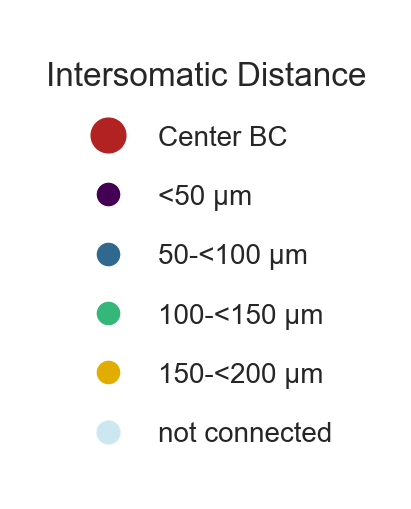

In [17]:
from matplotlib.lines import Line2D

bins = [("<50", 0, 50), ("50-<100", 50, 100), ("100-<150", 100, 150), ("150-<200", 150, 200)]
bin_colors = {"<50": '#440154',"50-<100": "#31688E", "100-<150": "#35B779", "150-<200": "#E1AD01"}

custom_handles = []

custom_handles.append(Line2D([0], [0], marker = 'o', color = 'firebrick', label = 'Center BC', markerfacecolor = 'firebrick', markersize = 25, linestyle = 'None'))

for bin_name, _, _ in bins:
    
    line = Line2D([0], [0], marker = 'o', color = 'w', label = f"{bin_name} µm", markerfacecolor = bin_colors[bin_name], markersize = 18)
    custom_handles.append(line)

custom_handles.append(Line2D([0], [0], marker = 'o', color = 'w', label = "not connected", markerfacecolor = 'lightblue', markersize = 18, alpha = 0.6))

fig_leg = plt.figure(figsize = (4, 5))
ax_leg = fig_leg.add_subplot(111)
ax_leg.axis('off')

leg = ax_leg.legend(handles=custom_handles, loc = 'center', frameon = False, title = "Intersomatic Distance", fontsize = 20, title_fontsize = 24, labelspacing = 1.2)

fig_leg.savefig('legendfinal.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()